In [1]:
import tensorflow as tf
!pip install transformers
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
df=pd.read_csv("/content/cleaned_reviews.csv")
df

,Name,Review,Number of Stars,Cleaned_Review
0,AARDY,Denise was terrific! I had put in some parame...,5.0,denise terrific put parameter website trip tan...
1,AARDY,"The website is clear, informative and easy to ...",5.0,website clear informative easy navigate decide...
2,AARDY,After looking online at AARDY for a travel ins...,5.0,looking online aardy travel insurance policy c...
3,AARDY,The agent was friendly and knowledgeable. She...,5.0,agent friendly knowledgeable looked previous t...
4,AARDY,She took the time to make sure I understood al...,5.0,took time make sure understood option help mak...
...,...,...,...,...
5996,sevencorners,Very slow claim process time. Difficult to re...,1.0,slow claim process time difficult reach phone
5997,sevencorners,I have submitted payment reimbursements twice ...,1.0,submitted payment reimbursement twice claim ne...
5998,sevencorners,These guys are just awful. At the beginning of...,1.0,guy awful beginning pandemic purchased cancel ...
5999,sevencorners,We have been using Seven corners for a few tim...,5.0,using seven corner time always great companywe...


In [3]:
df = df[df['Review'] != 'No review text found']
df

,Name,Review,Number of Stars,Cleaned_Review
0,AARDY,Denise was terrific! I had put in some parame...,5.0,denise terrific put parameter website trip tan...
1,AARDY,"The website is clear, informative and easy to ...",5.0,website clear informative easy navigate decide...
2,AARDY,After looking online at AARDY for a travel ins...,5.0,looking online aardy travel insurance policy c...
3,AARDY,The agent was friendly and knowledgeable. She...,5.0,agent friendly knowledgeable looked previous t...
4,AARDY,She took the time to make sure I understood al...,5.0,took time make sure understood option help mak...
...,...,...,...,...
5996,sevencorners,Very slow claim process time. Difficult to re...,1.0,slow claim process time difficult reach phone
5997,sevencorners,I have submitted payment reimbursements twice ...,1.0,submitted payment reimbursement twice claim ne...
5998,sevencorners,These guys are just awful. At the beginning of...,1.0,guy awful beginning pandemic purchased cancel ...
5999,sevencorners,We have been using Seven corners for a few tim...,5.0,using seven corner time always great companywe...


In [7]:
df.isna().sum()

Name               0
Review             0
Number of Stars    0
Cleaned_Review     0
dtype: int64

In [6]:
df= df.dropna()

In [8]:
df['sentiment'] = df['Number of Stars'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else 2))

<ipython-input-8-04d3b44aeb19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Number of Stars'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else 2))


In [9]:
df

,Name,Review,Number of Stars,Cleaned_Review,sentiment
0,AARDY,Denise was terrific! I had put in some parame...,5.0,denise terrific put parameter website trip tan...,1
1,AARDY,"The website is clear, informative and easy to ...",5.0,website clear informative easy navigate decide...,1
2,AARDY,After looking online at AARDY for a travel ins...,5.0,looking online aardy travel insurance policy c...,1
3,AARDY,The agent was friendly and knowledgeable. She...,5.0,agent friendly knowledgeable looked previous t...,1
4,AARDY,She took the time to make sure I understood al...,5.0,took time make sure understood option help mak...,1
...,...,...,...,...,...
5996,sevencorners,Very slow claim process time. Difficult to re...,1.0,slow claim process time difficult reach phone,0
5997,sevencorners,I have submitted payment reimbursements twice ...,1.0,submitted payment reimbursement twice claim ne...,0
5998,sevencorners,These guys are just awful. At the beginning of...,1.0,guy awful beginning pandemic purchased cancel ...,0
5999,sevencorners,We have been using Seven corners for a few tim...,5.0,using seven corner time always great companywe...,1


###Visualise the number of positive =1, negative=0 and neutral=2 reviews

<Axes: >

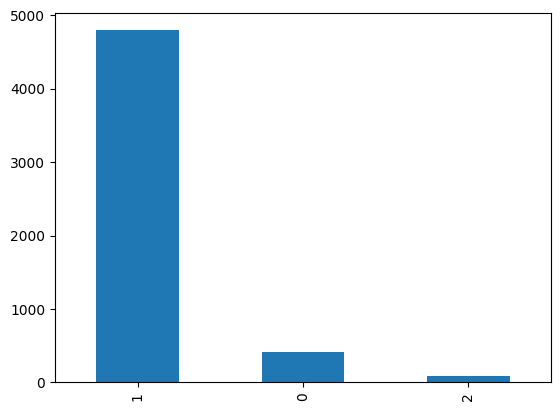

In [10]:
df['sentiment'].value_counts().plot(kind='bar')

###Visualise the number of positive =1, negative=0 and neutral=2 reviews within the same company

<Axes: xlabel='Name'>

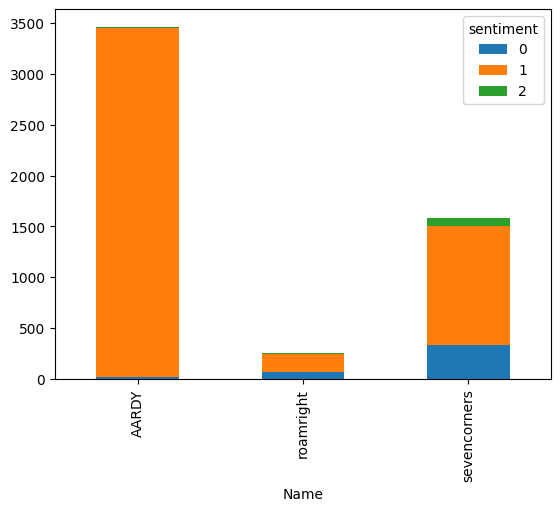

In [11]:
df.groupby(['Name', 'sentiment']).size().unstack().plot(kind='bar', stacked=True)

###Text augmentation

In [12]:
!pip install nlpaug


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.9 MB/s eta 0:00:00


In [13]:
import pandas as pd
import nlpaug.augmenter.word as naw

# Assuming your DataFrame is named 'df' and you have a column 'sentiment' and 'Cleaned_Review'
positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]
neutral_reviews = df[df['sentiment'] == 2]

# Calculate the number of positive reviews
num_positive_reviews = len(positive_reviews)

# Resample negative and neutral reviews to match the number of positive reviews
augmented_negative_reviews = negative_reviews.sample(n=num_positive_reviews, replace=True)
augmented_neutral_reviews = neutral_reviews.sample(n=num_positive_reviews, replace=True)

# Use nlpaug to perform text augmentation on the 'Cleaned_Review' column
aug = naw.SynonymAug(aug_src='wordnet')
augmented_negative_reviews['Cleaned_Review'] = augmented_negative_reviews['Cleaned_Review'].apply(lambda x: aug.augment(x))
augmented_neutral_reviews['Cleaned_Review'] = augmented_neutral_reviews['Cleaned_Review'].apply(lambda x: aug.augment(x))

# Concatenate the original positive reviews with augmented negative and neutral reviews
balanced_df = pd.concat([positive_reviews, augmented_negative_reviews, augmented_neutral_reviews])

# Shuffle the DataFrame to mix the positive, negative, and neutral reviews
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [14]:
balanced_df

,Name,Review,Number of Stars,Cleaned_Review,sentiment
0,sevencorners,I had one claim. It was rejected. As a resul...,1.0,[one call rejected result renew travel insuran...,0
1,sevencorners,Updated Jan 2023: After some back and forth an...,3.0,[updated jan back forth submitting paperwork f...,2
2,sevencorners,"Great service, very responsive to email questi...",5.0,great service responsive email question easy w...,1
3,sevencorners,This is a scam. They take your money and don’t...,1.0,[scam take money dont thing buy trip up policy],0
4,AARDY,Easy to sign up and comparison products were i...,5.0,easy sign comparison product included page mak...,1
...,...,...,...,...,...
14377,AARDY,Reps were very helpful over the phone. I did n...,3.0,[rep helpful phone like surplus stride thru e ...,2
14378,sevencorners,Helpful and happy with the service! Good price...,5.0,helpful happy service good price,1
14379,sevencorners,the purchase went fine. didn't need to use it...,3.0,[purchase went fine didnt need expend means ju...,2
14380,roamright,We just tried to find the cheapest policy that...,3.0,[tried find cheapest policy met possibility mi...,2


###Using BERT pretrained model

In [15]:
reviews = balanced_df['Review'].values.tolist()
labels = balanced_df['sentiment'].tolist()

In [16]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=.2)

In [17]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenizer([training_sentences[0]], truncation=True,

                            padding=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

{'input_ids': [[101, 7078, 6659, 999, 1045, 6406, 1037, 4366, 2067, 2012, 1996, 2927, 1997, 2285, 2007, 2035, 1996, 4871, 2734, 1010, 2130, 4149, 1996, 1000, 17542, 2005, 2151, 3114, 1000, 1010, 2144, 2057, 2134, 1005, 1056, 2113, 2054, 2001, 6230, 2007, 1996, 6090, 3207, 7712, 1012, 1045, 4149, 1996, 2198, 13849, 4034, 3165, 2933, 1012, 1045, 2170, 5560, 2382, 10259, 2015, 2044, 2000, 2156, 1996, 3570, 1998, 2027, 17806, 1998, 2056, 2008, 2027, 2020, 2941, 2770, 2006, 1037, 4720, 10259, 2735, 2105, 1010, 2061, 1045, 2435, 2068, 1037, 2210, 3389, 4576, 1012, 2021, 2059, 1010, 1045, 2131, 2019, 10373, 1999, 2233, 2055, 11303, 3176, 4871, 1010, 2061, 1045, 2741, 2068, 1999, 2153, 1012, 1045, 2170, 2000, 2156, 2129, 2146, 2009, 2052, 2202, 1010, 2027, 2056, 2019, 3176, 2382, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [18]:

train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    validation_labels
))

In [20]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=3)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)

# Compile the model with an explicit loss function
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=2,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/2
720/720 [==============================] - 711s 957ms/step - loss: 0.1471 - accuracy: 0.9420 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 2/2
720/720 [==============================] - 697s 969ms/step - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.0211 - val_accuracy: 0.9930


In [23]:
model.save_pretrained("./sentiment")

In [24]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./sentiment")

Some layers from the model checkpoint at ./sentiment were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./sentiment and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
test_sentence = "i waste my money"


predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]


tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['0','1']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

1/1 [==============================] - 0s 43ms/step
0


In [48]:
test_sentence = "this is heplful"


predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]


tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['0','1']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

1/1 [==============================] - 0s 29ms/step
1


In [51]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from IPython.display import display, HTML


def predict_sentiment(user_input):
    predict_input = tokenizer.encode(user_input, truncation=True, padding=True, return_tensors="tf")
    tf_output = loaded_model.predict(predict_input)[0]
    tf_prediction = tf.nn.softmax(tf_output, axis=1)
    labels = ['0', '1']
    label = tf.argmax(tf_prediction, axis=1)
    prediction = labels[label[0]]
    return prediction

def interactive_interface():
    display(HTML("<h1>Sentiment Analysis</h1>"))
    user_input = input("Enter your text: ")
    prediction = predict_sentiment(user_input)
    display(HTML(f"<p>You entered: {user_input}</p>"))
    display(HTML(f"<p>Prediction: {prediction}</p>"))

interactive_interface()


Enter your text: i waste my money
1/1 [==============================] - 0s 44ms/step
